***Note: This example is discussed in detail by 
    <cite data-cite="GawPan20X">(Gawthrop and Pan, 2020)</cite> 
    available [here](https://arxiv.org/abs/2009.02217).***

***Note: this is the ElectroChemical.ipynb notebook. The
PDF version "Electrochemical Modelling and Ion Channels"
is available [here](Electrochemical.pdf).***


# Introduction
## Faraday equivalent potential
The bond graph approach uses the notion of energy covariables: a pair
of variables whose product is power. Thus, for example, electrical
systems have voltage (with units \si{\volt}) and current (with units
\si{\ampere}) as covariables and the product has units of power
(\si{\watt} or \si{\joule\per\second}). Chemical system covariables
are chemical potential $\mu$ (with units \si{\joule\per\coulomb}) and
molar flow $f$ (with units
\si{\mole\per\second})\citep{OstPerKat71,OstPerKat73,GawCra14}; again
the product has units of power (\si{\watt} or \si{\joule\per\second}).

The commonality of power over different physical domains makes the
bond graph approach particularly appropriate to model multi-domain
systems, in particular chemoelectrical systems
\citep{GawSieKam17}. Noting that the conversion factor relating the
electrical and chemical domains is \emph{Faraday's constant}
$F\approx\SI{96485}{C.mol^{-1}}$. As discussed by \citet{Kar90}
and \citet{GawSieKam17}, this conversion can be represented by the
bond graph transformer (**TF**) component. An alternative approach
introduced by \citet{Gaw17a} is to divide the covariables $\mu$ and
$f$ by $F$ to give the pair of covariables $\phi$ and $f$
where:
\begin{align}
  &\text{Faraday-equivalent chemical potential}& \phi &= \frac{\mu}{F} \si{\volt}\label{eq:phi}\\   &\text{Faraday-equivalent flow}& f &= F v \si{\ampere}\label{eq:f} 
\end{align}
  
## Chemical properties
The **Ce** components representing chemical species generate Faraday-equivalent potential (FEP) $\phi$ (measured in Volts) in terms of the amount of species $x$ as:
\begin{align}
\phi &= \phi^\ominus + \phi_N \ln \frac{x}{x^\ominus}\\
&= \phi_N \ln K x\\
\text{where }
K &= \frac{K^\ominus}{x^\ominus}\\
V_N &= \frac{RT}{F} \approx 26 mV\\
\text{and }
K^\ominus &= \ln\frac{\phi^\ominus}{\phi_N}
\end{align}
$\phi^\ominus$ in the standard potential at the standard amount $x^\ominus$.
$R$ is the universal gas constant and $F$ Faraday's constant.

The amount of species $x$ is the integral of the species flow $f$:
\begin{equation}
x = \int^t f(\tau)d\tau
\end{equation}

The formula can also be expressed in terms of concentration $c$ as:
\begin{align}
\phi &= \phi_N \ln K_C^\prime c\\
\text{where }
K_c^\prime &= \frac{K^\ominus}{c^\ominus}\\
\end{align}
$c^\ominus$ is the concentration at standard conditions.
## Electrical properties
The **C** components representing electrical capacitance generate electrical potential $\phi$ (measured in Volts) in terms of the amount of positively charges $x$ and electrical capacitance $C$ as:
\begin{align}
\phi &= \frac{x}{C}\\
&= \phi_N K_E x_E\\
\text{where }
K_E &= \frac{1}{x_N}\\
\text{and }
x_N &= C\phi_N 
\end{align}
The amount of charge $x_E$ is the integral of the charge flow (current) $f_E$:
\begin{equation}
x_E = \int^t f_E(\tau)d\tau
\end{equation}

In [1]:
## Some useful imports
import BondGraphTools as bgt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Stoichiometric analysis
import stoich as st

## SVG
import svgBondGraph as sbg

## Display (eg disp.SVG(), disp.
import IPython.display as disp

quiet = True

## Fix the concentrations via chemostats
Fix_conc = False

In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
## Concentrations in nM for Na and K in Giant Squid Axon
## From Keener & Sneyd Table 2.1
conc_e = {'Na':437, 'K':20}
conc_i = {'Na':50, 'K':397}

# Electrodiffusion
Cellular membranes have pores though which chemical species can diffuse. If the species are charged, the diffusion both depends on and creates an electrical potential.
This section looks at a single ionic species with generic name \ch{I+}; this can be thought of as \ch{Na+} or \ch{K+}.

The bond graph representation of a charged ion has three components: a **Ce** component to represent the *chemical* properties of the ion, a **C** component to repesent the *electrical*   properties of the ion and a **1** junction to make the flow into the two components identical.

The resultant potential is then the sum of the chemical and electrical components:
\begin{align}
\phi &= \phi_C + \phi_E\\
\text{where }
\phi_C &= \phi_N \ln K x\\
\text{and }
\phi_E = \phi_N K_E x_E
\end{align}

If the ion has *two* charges (\ch{I^{++}}) the bold bonds in the diagram would each be replaced by *two* bonds; alternatively, if the ion had a *negative*  charge (\ch{I-}) the bold bonds in the diagram would each be replaced by a bond with *reversed* direction.

The bond graph of the pore itself has two pools of charged ions: internal and external connected by a reaction (**Re**) component. As the ion in each pool is the same, the property $K^\prime$ is the same for each pool. Thus the reaction potential $\Phi$ is the difference of the potentials of the internal and external ion pools:
\begin{equation}
\Phi = \phi_N \left ( \ln K^\prime c_i - \ln K^\prime c_e \right )
+ \left ( \phi_{Ei} - \phi_{Ee} \right ) 
\end{equation}
Defining $\Delta E = \phi_{Ei} - \phi_{Ee}$ and noting that at equilibrium $\Phi=0$:
\begin{equation}
\Delta E = \phi_N \ln\frac{c_e}{c_i}
\end{equation}
This is the expresion for the *Nernst potential* for a species with a single positive charge.

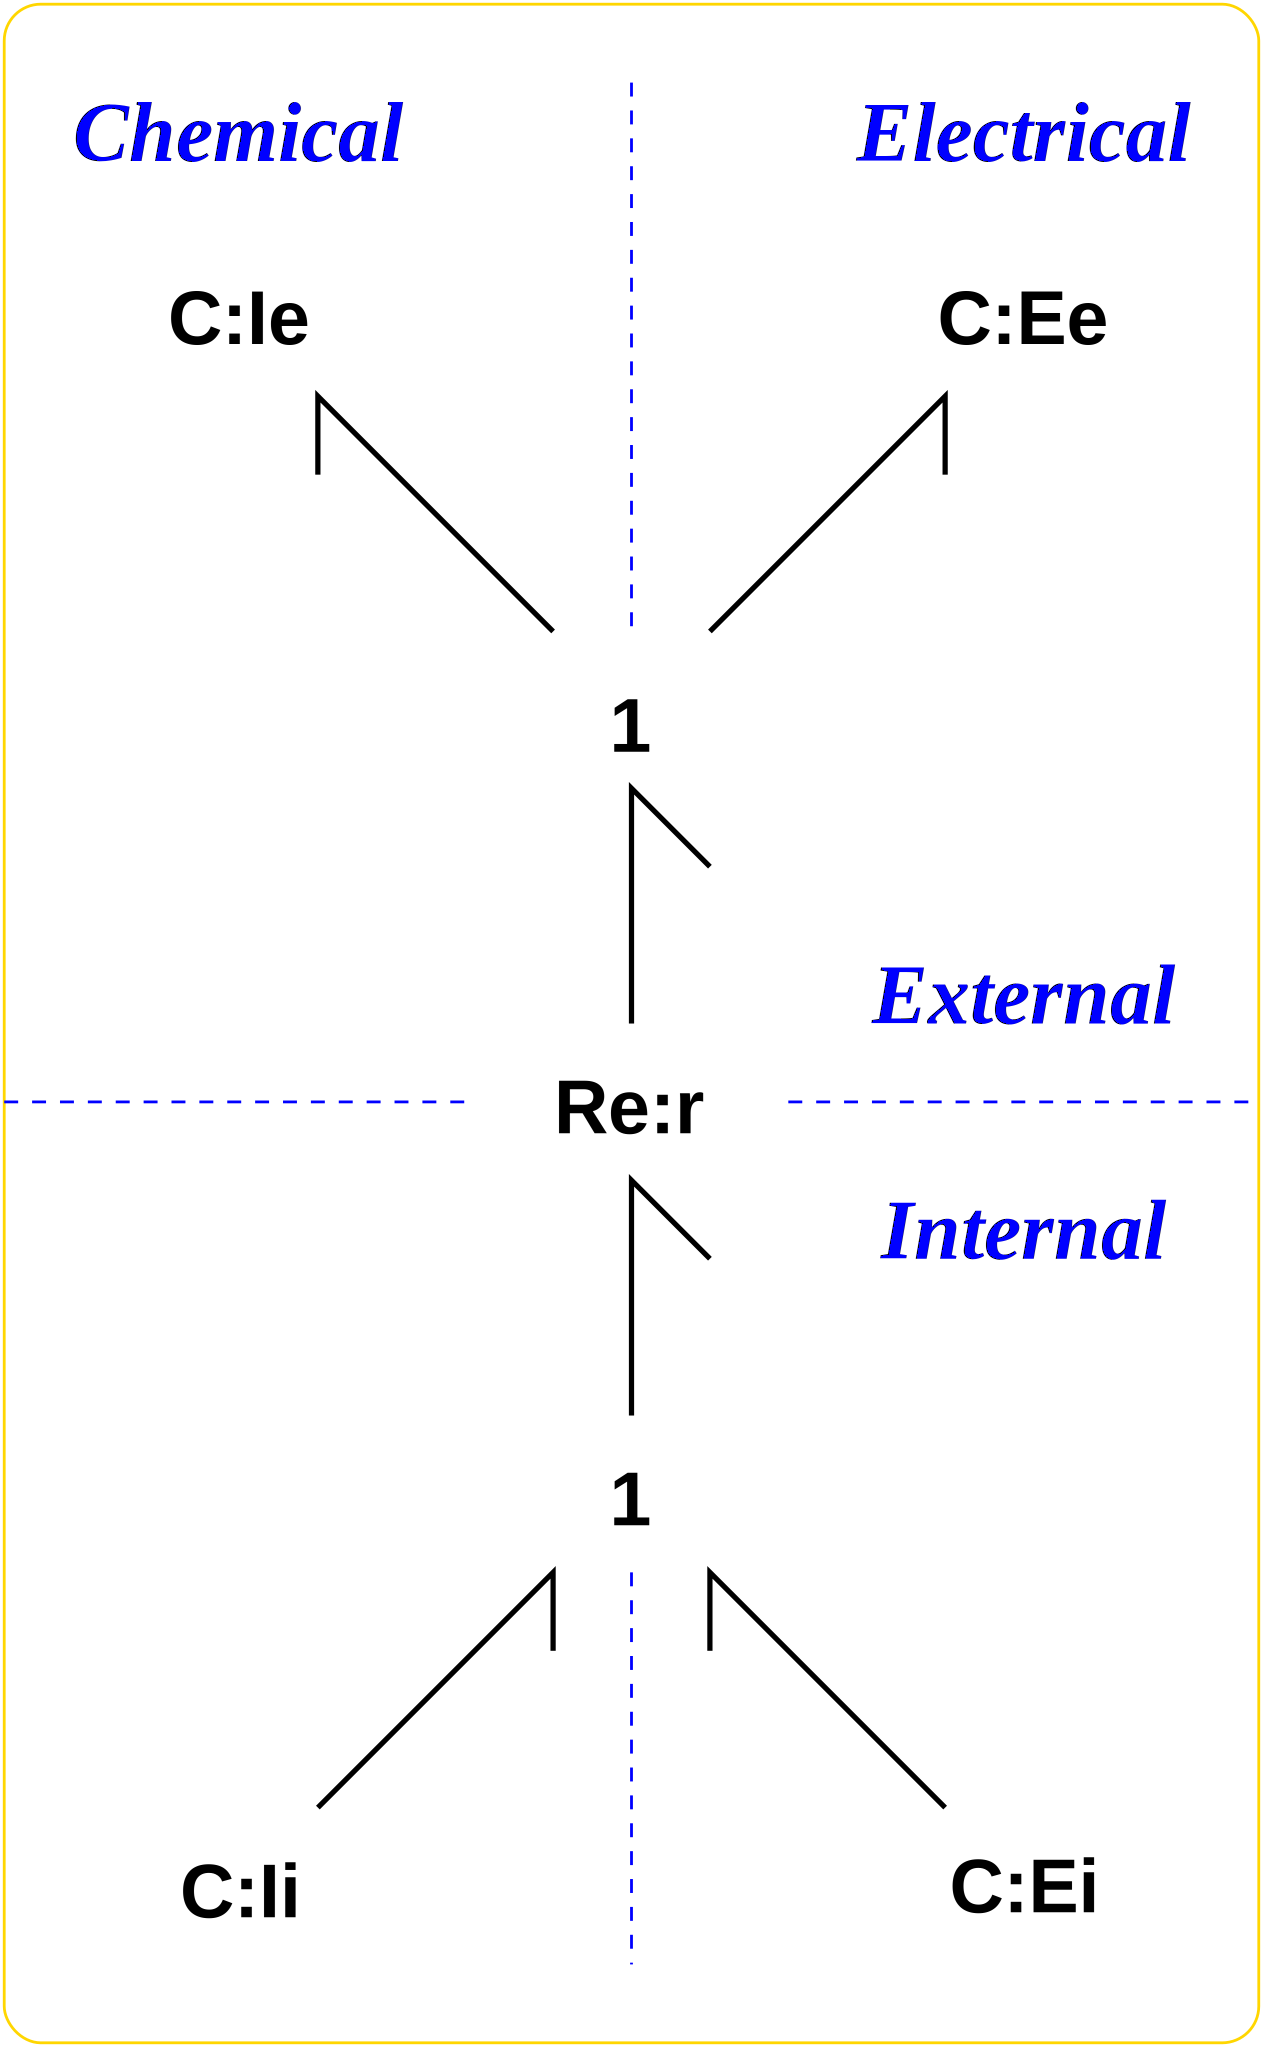

In [3]:
## Electrodiffusion
sbg.model('Electrodiffusion_abg.svg')
import Electrodiffusion_abg
disp.SVG('Electrodiffusion_abg.svg')

In [4]:
## Stoichiometry: linear Re
s = st.stoich(Electrodiffusion_abg.model(),linear=['Ei','Ee','r'],quiet=quiet)

if Fix_conc:
    chemostats = ['Ii','Ie']
else:
    chemostats = []
    
sc = st.statify(s,chemostats=chemostats)
#print(s['species'])


In [5]:
## Stoichiometric matrix
disp.Latex(st.sprintl(s,'N'))
#print(st.sprintl(s,'species'))


<IPython.core.display.Latex object>

In [6]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [7]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

In [8]:
## Stoichiometry: nonlinear Re
s = st.stoich(Electrodiffusion_abg.model(),linear=['Ei','Ee'],quiet=quiet)

if Fix_conc:
    chemostats = ['Ii','Ie']
else:
    chemostats = []
    
sc = st.statify(s,chemostats=chemostats)
#print(s['species'])


In [9]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [10]:
## Flows
print(st.sprintvl(s))
disp.Latex(st.sprintvl(s))

\begin{align}
v_{r} &= \kappa_{r} \left(- K_{Ie} x_{Ie} e^{\frac{K_{Ee} x_{Ee}}{V_{N}}} + K_{Ii} x_{Ii} e^{\frac{K_{Ei} x_{Ei}}{V_{N}}}\right)
\end{align}



<IPython.core.display.Latex object>

In [11]:
#disp.Latex(st.sprintl(s,'species'))

In [12]:
#disp.Latex(st.sprintl(s,'N'))

In [13]:
## Set non-unit parameters
K_Ii = 1e-3
K_Ie = 1e-3
C = 1
def setPar(s,C=1,conc_i=1,conc_e=1,prefix=['']):
    
    #V_N = st.V_N()
    K_E = 1/C
    #print(K_E)
    
    
    ## Parameters
    parameter = {}
    parameter['K_Ei'] = 0
    parameter['K_Ee'] = K_E
    
    ## Initial state
    sp = s['species']
    re = s['reaction']
    X0 = np.ones(s['n_X'])
    X0[sp.index('Ei')] = 0
    X0[sp.index('Ee')] = 0
    for p in prefix:
        
        ## Parameters
        KK = 'K_'+p
        kk = 'kappa_'+p
        parameter[KK+'Ii'] = K_Ii
        parameter[KK+'Ie'] = K_Ie
        
        ## States and kappa
        if len(p) is 0:
            Ion = 'Na'
        else:
            Ion = p[0:len(p)-1]
            #X0[sp.index('Ee')] = 0.077/K_E
        
        print(Ion)    
        X0[sp.index(p+'Ii')] = conc_i[Ion]/K_Ii
        X0[sp.index(p+'Ie')] = conc_e[Ion]/K_Ie
        parameter[kk+'r'] = 1/conc_i[Ion]
        
    return parameter,X0

In [14]:
def CheckTheory(dat):
    
    if 'Ii' in s['species']:
        ## Check Nernst potential
        t = dat['t']
        phi_Ei = dat['phi'][:,s['species'].index('Ei')]
        phi_Ee = dat['phi'][:,s['species'].index('Ee')]
        x_Ii = dat['X'][:,s['species'].index('Ii')]
        x_Ie = dat['X'][:,s['species'].index('Ie')]
    #     v = dat['V'][:,s['reaction'].index('r')]
        V_N = st.V_N()

    #     v_ss = v[-1]
        dV = (phi_Ei[-1]-phi_Ee[-1] )
        dV_theory = V_N*np.log(x_Ie[-1]/x_Ii[-1])
    #     print(f'Steady-state flow is {v_ss:0.2}')
        print(f'dV = {dV*1000:4.1f}mV')
        print(f'dV_Theory = {dV_theory*1000:4.1f}mV')



In [15]:
def Simulate(s,sc,T=1,X_chemo=None,prefix=['']):

    ## Time
    t = np.linspace(0,T,500)

    ## Parameters and initial state
    parameter,X0 = setPar(s,C=C,conc_i=conc_i,conc_e=conc_e,prefix=prefix)
    
    ## Simulate
    dat = st.sim(s,sc=sc,t=t,parameter=parameter,X0=X0,X_chemo=X_chemo,quiet=True)

    CheckTheory(dat)

    return dat



Na
dV = 57.9mV
dV_Theory = 57.9mV


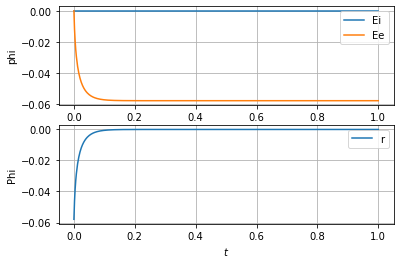

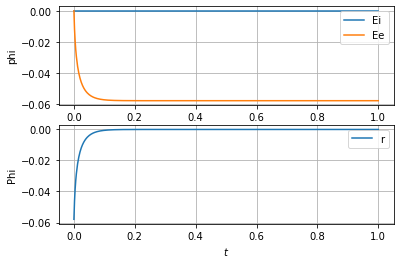

In [16]:
dat = Simulate(s,sc)
#st.plot(s,dat)
st.plot(s,dat,plotPhi=True,species=['Ei','Ee'])
st.plot(s,dat,plotPhi=True,species=['Ei','Ee'],filename='Figs/electrodiffusion.pdf')


## Voltage clamp
The voltage agross the membrane is clamped by setting C:Ei and C_Ee as chemostats. This allows the voltage-current relationship to be plotted. It is compared with the Hodgkin-Huxley (linear) model and the Goldman-Huxley-Katz model.
The bond graph model can be modified to reflect the other two models \cite{GawSieKam17}.

In [17]:
## Stoichiometry
##chemostats = ['Ii','Ie','Ei','Ee']
chemostats = chemostats + ['Ei','Ee']
scc = st.statify(s,chemostats=chemostats)
#print(s['species'])


Na
dV = 57.9mV
dV_Theory = 57.8mV


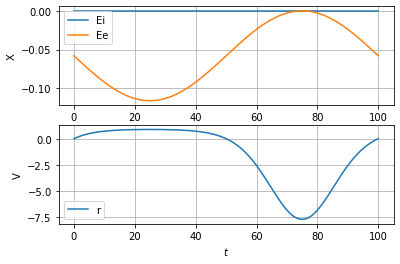

In [18]:
X_chemo = {}
V_Nernst = st.V_N()*np.log(conc_e['Na']/conc_i['Na'])
#print(f'V_Nernst = {1000*V_Nernst:4.1f} mV')
T = 100

CV = C*V_Nernst
# x_chemo = f'{CV}*(np.sin({2*np.pi/T}*t))'
# #X_chemo['Ee'] = f'{-CV/2}-'+x_chemo
# X_chemo['E'] = x_chemo
x_chemo = f'-{CV}*(1+1.0*np.sin({2*np.pi/T}*t))'
X_chemo['Ee'] = x_chemo


#print(X_chemo)

dat = Simulate(s,scc,T=T,X_chemo=X_chemo)
#st.plot(s,dat)
st.plot(s,dat,species=['Ei','Ee'])

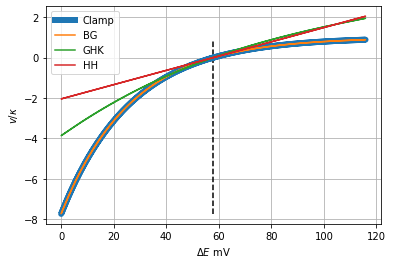

In [19]:
def PlotClamp():
    t = dat['t']
    phi_Ei = dat['phi'][:,s['species'].index('Ei')]
    phi_Ee = dat['phi'][:,s['species'].index('Ee')]
    x_Ii = dat['X'][:,s['species'].index('Ii')]
    x_Ie = dat['X'][:,s['species'].index('Ie')]
    v = dat['V'][:,s['reaction'].index('r')]
    V_N = st.V_N()

    dV = phi_Ei-phi_Ee

    ## BG
    v_BG = (1/x_Ii)*(x_Ii - x_Ie*np.exp(-dV/V_N))

    ## GHK
    v_GHK = 0.5*v_BG*(dV/V_N)/(1-np.exp(-dV/V_N))

    ## HH
    v_HH = (np.exp(-V_Nernst))*(dV - V_Nernst)/V_N

    plt.plot(dV*1000,v,label='Clamp',lw = 6)
    plt.plot(dV*1000,v_BG,label='BG')
    plt.plot(dV*1000,v_GHK,label='GHK')
    plt.plot(dV*1000,v_HH,label='HH')
    plt.vlines(1000*V_Nernst,min(v),max(v),linestyle='dashed')
    plt.grid()
    plt.legend()
    plt.xlabel('$\Delta E$ mV')
    plt.ylabel('$v/\kappa$')
    plt.savefig('Figs/clamp.pdf')
    
PlotClamp()

# Gated ion channel


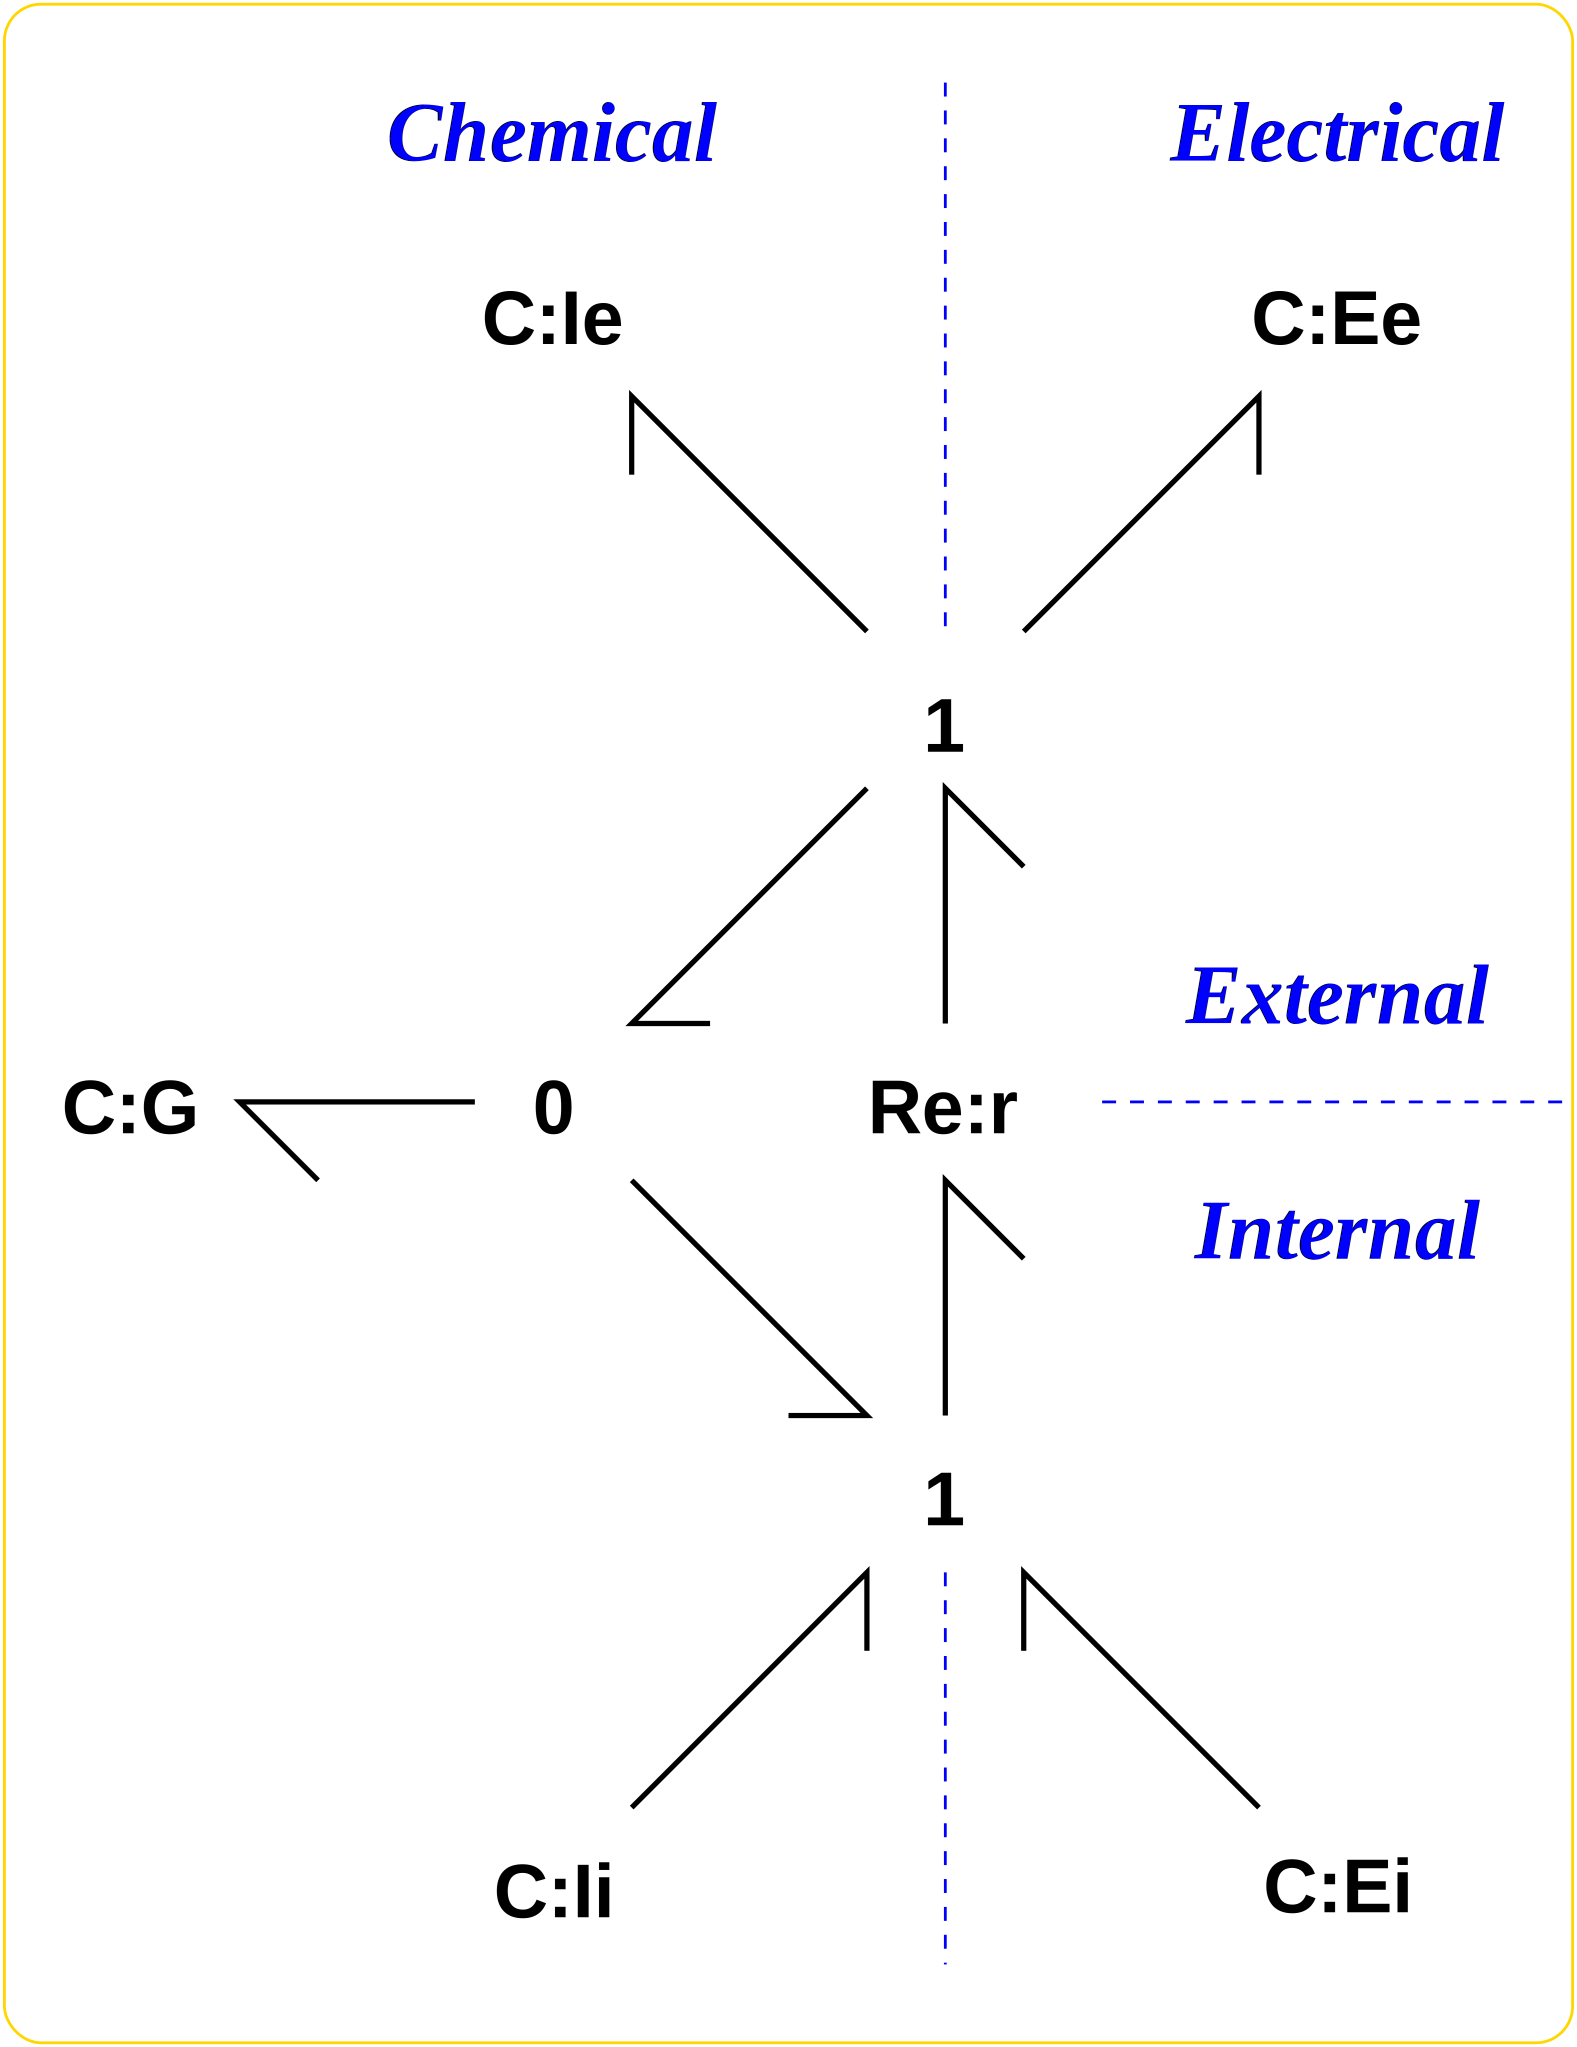

In [20]:
## Ion Channel
sbg.model('IonChannel_abg.svg')
import IonChannel_abg
disp.SVG('IonChannel_abg.svg')

In [21]:
## Stoichiometry
s = st.stoich(IonChannel_abg.model(),linear=['Ei','Ee'],quiet=quiet)
if Fix_conc:
    chemostats = ['Ii','Ie','G']
else:
    chemostats = ['G']
sc = st.statify(s,chemostats=chemostats)
print(s['species'])


['Ee', 'Ei', 'G', 'Ie', 'Ii']


In [22]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [23]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

Na
dV = 57.4mV
dV_Theory = 57.9mV


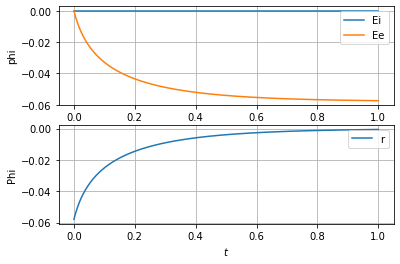

In [24]:
X_chemo = {'G':'0.1'}
dat = Simulate(s,sc,X_chemo=X_chemo)
#st.plot(s,dat)
st.plot(s,dat,plotPhi=True,species=['Ei','Ee'])

# Interacting ion channels

Two instances of the ion channel module are combined; one corresponds to \ch{Na+} and one to \ch{K+}. The species concentations are encapsulated in the individual modules, but the electrical capaciter are shared. This is a simplified version of the Hodgkin-Huxley model of the squid giant axon and the correponding \ch{Na+} and \ch{K+} concentrations are used.

The simulations use piecewise constant gating variables $G_{Na}$ and $G_{K}$:
\begin{align}
G_K &= 
\begin{cases}
10^{-6} & \text{for $0.3<t<0.35$}\\
1 & \text{otherwise}
\end{cases}\\
G_{Na} &= 
\begin{cases}
1 & \text{for $0.3<t<0.35$}\\
4.3 \times 10^{-3} & \text{otherwise}
\end{cases}
\end{align}

The time course of the membrane potential $\Delta E$ can be explained as follows.

\begin{description}
\item[$t<0.3$] $\Delta E$ moves from the initial condition of zero to a *resting potential* of about $-65$mV.

This corresponds to the value in Table 2.1 of Keener \& Sneyd; the resting potential depends not only on Nernst potentials of ch{Na+} and \ch{K+} (which in turn depends on the concentrations) but also on the values of the gating potential.
\item[$0.3<t<0.35$] $\Delta E$ undergoes a typical action potential as the \ch{Na+} gate opens and moves toward the Nernst potential for \ch{Na+} until the gate closes.
\item[$t>0.35$] $\Delta E$ 
returns to the resting potential.
\end{description}

In this simple example the gating variables $G_{Na}$ and $G_{K}$ are independent variables, in reality, and in the HH model, the gating variables are modulated by the membrane potential $\Delta E$. This is discussed in a bond graph context by \citet{GawSieKam17}.


Creating subsystem: IonChannel:K
Creating subsystem: IonChannel:Na


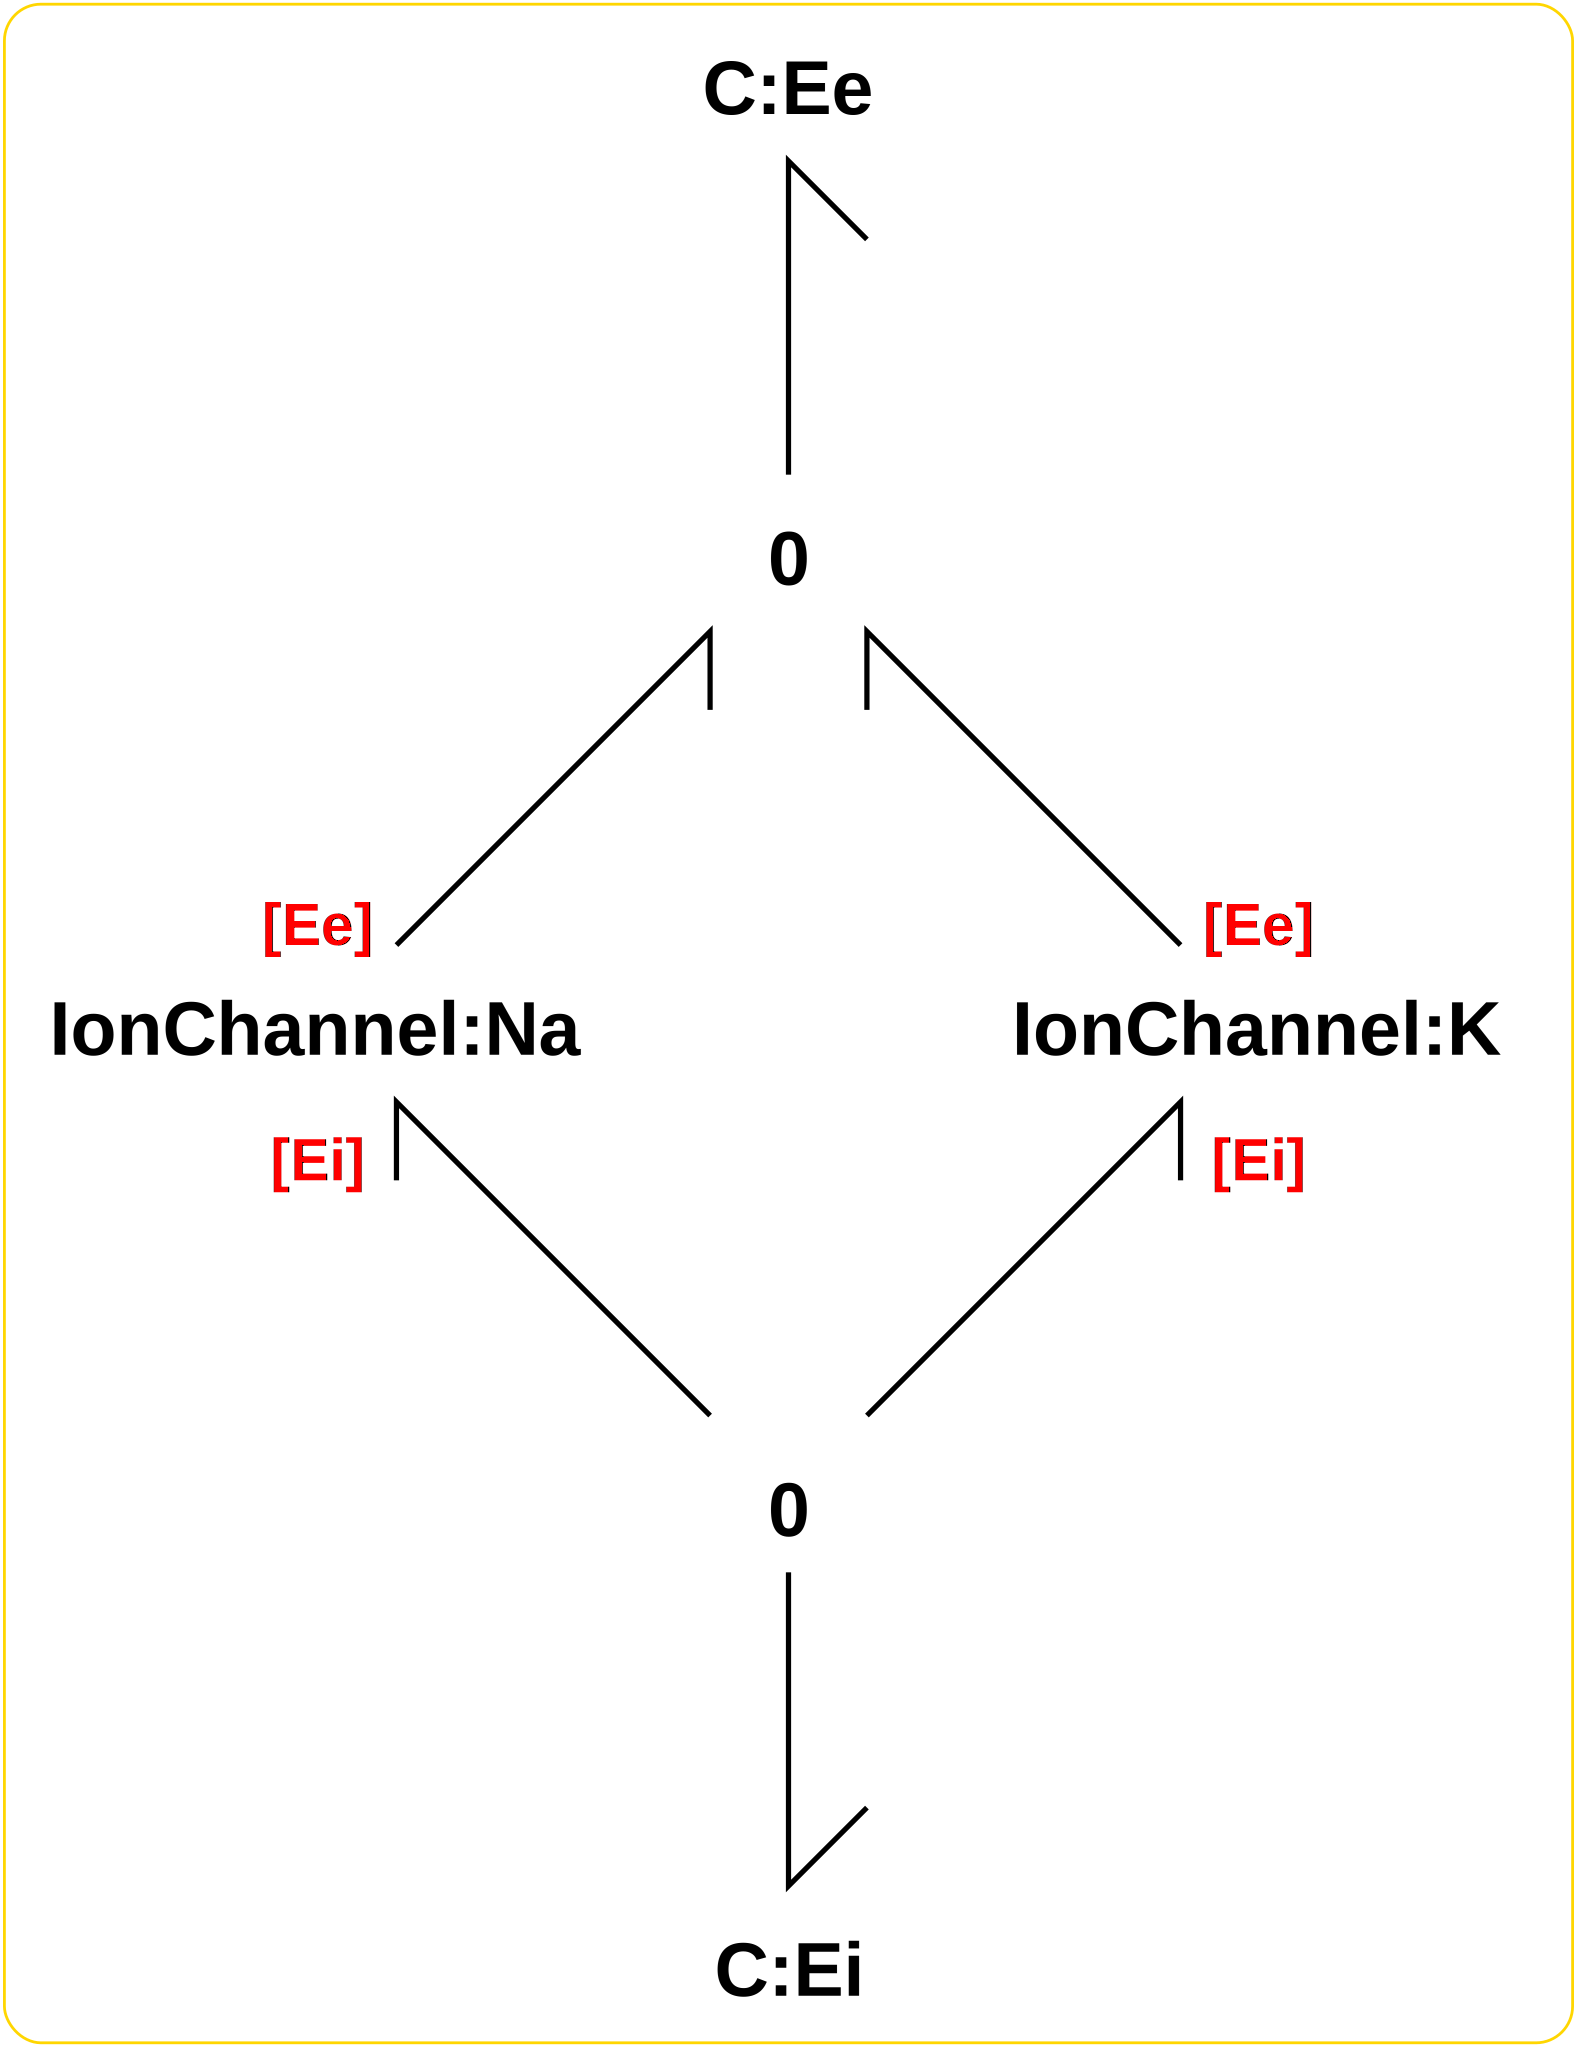

In [25]:
## Ion Channels
sbg.model('IonChannels_abg.svg')
import IonChannels_abg
disp.SVG('IonChannels_abg.svg')

In [26]:
## Stoichiometry
s = st.stoich(IonChannels_abg.model(),linear=['Ei','Ee'],quiet=quiet)
if Fix_conc:
    chemostats = ['Na_Ii','Na_Ie','Na_G', 'K_Ii','K_Ie','K_G']
else:
    chemostats = ['Na_G','K_G']
sc = st.statify(s,chemostats=chemostats)
print(s['species'])


['Ee', 'Ei', 'K_G', 'K_Ie', 'K_Ii', 'Na_G', 'Na_Ie', 'Na_Ii']


In [27]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [28]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

Na
K


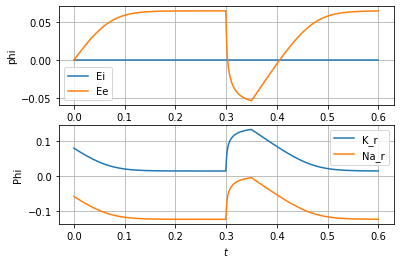

In [29]:
t0_Na = 0.3
t1_Na = 0.35
t0_K = 0.35
t1_K = 1.0

G_K_0 = 1e-6
G_Na_0 = 4.3e-3

G_K = f'{G_K_0}+np.heaviside(t,1)-np.heaviside(t-{t0_Na},1)+np.heaviside(t-{t0_K},1)-np.heaviside(t-{t1_K},1)'
G_Na = f'{G_Na_0}+np.heaviside(t-{t0_Na},1)-np.heaviside(t-{t1_Na},1)'
# G_K = '1e-1'
# G_Na = '1e-6'
X_chemo = {'Na_G':G_Na,'K_G':G_K}
dat = Simulate(s,sc,X_chemo=X_chemo,prefix=['Na_','K_'],T=0.6)
#st.plot(s,dat)
st.plot(s,dat,plotPhi=True,species=['Ei','Ee'])

Resting potential = -64.90 mV


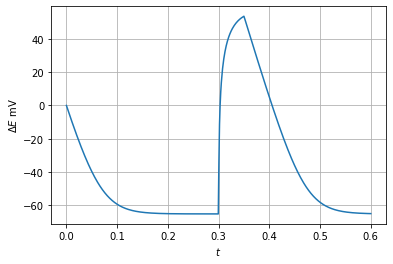

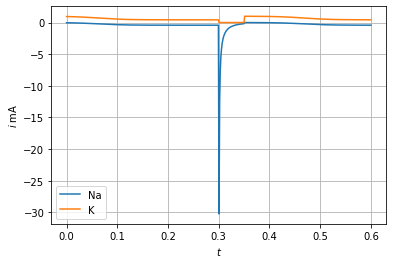

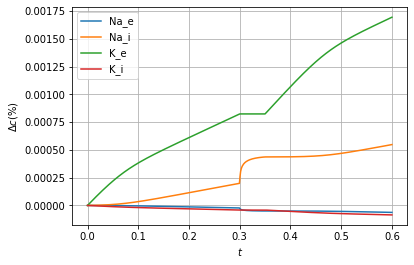

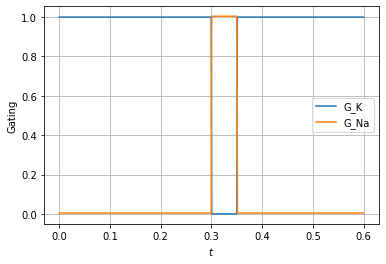

In [30]:
def PlotAction():
    t = dat['t']
    phi_Ei = dat['phi'][:,s['species'].index('Ei')]
    phi_Ee = dat['phi'][:,s['species'].index('Ee')]
    dE = phi_Ei-phi_Ee
    
    print(f'Resting potential = {1000*dE[-1]:.2f} mV')
    
    X_G_K = dat['X'][:,s['species'].index('K_G')]
    X_G_Na = dat['X'][:,s['species'].index('Na_G')]

    v_Na = dat['V'][:,s['reaction'].index('Na_r')]
    v_K  = dat['V'][:,s['reaction'].index('K_r')]
    
    
    conc_Na_e = K_Ie*dat['X'][:,s['species'].index('Na_Ie')]
    conc_Na_i = K_Ii*dat['X'][:,s['species'].index('Na_Ii')]
    conc_Na_e_0 = conc_Na_e[0]
    conc_Na_i_0 = conc_Na_i[0]

    conc_K_e = K_Ie*dat['X'][:,s['species'].index('K_Ie')]
    conc_K_i = K_Ii*dat['X'][:,s['species'].index('K_Ii')]
    conc_K_e_0 = conc_K_e[0]
    conc_K_i_0 = conc_K_i[0]

    plt.plot(t,1000*dE)
    plt.grid()
    plt.ylabel('$\Delta E$ mV')
    plt.xlabel('$t$')
    plt.savefig('Figs/action.pdf')
    plt.show()
    
    plt.plot(t,v_Na,label='Na')
    plt.plot(t,v_K,label='K')
    plt.grid()
    plt.legend()
    plt.ylabel('$i$ mA')
    plt.xlabel('$t$')
    plt.savefig('Figs/action_current.pdf')
    plt.show()
    
    plt.plot(t,100*(conc_Na_e-conc_Na_e_0)/conc_Na_e_0,label='Na_e')
    plt.plot(t,100*(conc_Na_i-conc_Na_i_0)/conc_Na_i_0,label='Na_i')
    plt.plot(t,100*(conc_K_e-conc_K_e_0)/conc_K_e_0,label='K_e')
    plt.plot(t,100*(conc_K_i-conc_K_i_0)/conc_K_i_0,label='K_i')

    plt.legend()
    plt.grid()
    plt.ylabel(r'$\Delta c (\%)$')
    plt.xlabel('$t$')
    plt.savefig('Figs/action_conc.pdf')
    plt.show()
    
    plt.plot(t,X_G_K,label='G_K')
    plt.plot(t,X_G_Na,label='G_Na')
    plt.legend()
    plt.grid()
    plt.ylabel('Gating')
    plt.xlabel('$t$')
    plt.savefig('Figs/action_gating.pdf')
    plt.show()
    
    

PlotAction()